Labourers from Malaga (Spain) and Tanger (Morocco) were asked to get a blood test in order to carry out a study. It was noted that the workers' energy intake habits were notably different between both cities. Malaga's labourers presented a caloric intake that the researcher, a Mororccan doctor, considered excesive, especially when compering the meals proportions served at Malaga's restaurants to the family meals frequently shared in Morocco. The researcher's hypothese suggests that these food differences could be reflected in the blood test results and the BMI.

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [83]:
# Reading CSV
df = pd.read_csv('comparingDietBlood.csv', sep = ';')
# Convert 'Height' from object to float, replacing ',' with '.'
df['Height'] = df['Height'].str.replace(',', '.').astype(float)
df.head()

,Group,Cholesterol,Triglycerides,Glucose,Systolic BP,Diastolic BP,Weight,Height,Energy Intake,Exercise
0,Malaga,238,107,89,130,70,81,1.67,3521,1400
1,Tanger,251,163,90,130,90,85,1.67,1490,1730
2,Malaga,194,73,89,120,60,79,1.70,3701,2180
3,Tanger,169,71,65,110,60,86,1.81,3200,2150
4,Malaga,227,114,121,130,90,91,1.73,4124,1700


We use descriptive statistics, as well as skewness and kurtosis, to observe the differences between Malaga and Tanger.

In [171]:
# We create an extended version of the describe function in order to add the skewness and the kurtosis
def describe_extended(data):
    skewness = data.skew() # Calculates the skewness of each column
    kurtosis = data.kurtosis() # Calculates the kurtosis of each column
    
    # Transposes the DataFrames for 'skewness' and 'kurtosis', converting columns into rows
    # Renames the index of the first row to identify each metric
    skewness_df = pd.DataFrame(skewness).T.rename(index = {0: 'skewness'})
    kurtosis_df = pd.DataFrame(kurtosis).T.rename(index = {0: 'kurtosis'})
    
    # Concatenates the new DatFrames to 'describe'
    return pd.concat([data.describe(), skewness_df, kurtosis_df])

In [167]:
df_group = df.groupby('Group')

# Applies the function to each group
dg = df_group.apply(describe_extended)
dg

Cholesterol  Triglycerides     Glucose  Systolic BP  \
Group                                                                  
Malaga count       50.000000      50.000000   50.000000    50.000000   
       mean       209.120000     113.220000   88.180000   121.700000   
       std         42.418055      69.893006   19.025965    12.841657   
       min        102.000000      38.000000   48.000000   100.000000   
       25%        184.250000      66.500000   78.500000   110.000000   
       50%        203.000000      95.000000   84.000000   120.000000   
       75%        238.000000     134.250000   90.000000   130.000000   
       max        335.000000     351.000000  159.000000   160.000000   
       skewness     0.333821       1.813393    2.022621     0.990488   
       kurtosis     1.047339       3.749387    6.210552     1.090086   
Tanger count       30.000000      30.000000   30.000000    30.000000   
       mean       162.666667      82.133333   78.033333   119.833333   
       std         44.806352      45.175316   11.266316    10.041580   
       min         82.000000      38.000000   65.000000   110.000000   
       25%        136.250000      57.000000   71.000000   110.000000   
       50%        164.500000      70.000000   75.000000   120.000000   
       75%        196.750000      93.250000   82.000000   123.750000   
       max        251.000000     271.000000  115.000000   150.000000   
       skewness     0.085482       2.814008    1.433075     1.116090   
       kurtosis    -0.533148      10.260715    2.699985     1.462823   

                 Diastolic BP      Weight     Height  Energy Intake  \
Group                                                                 
Malaga count        50.000000   50.000000  50.000000      50.000000   
       mean         70.300000   81.380000   1.694800    3528.040000   
       std           9.604952    8.726900   0.047132     550.937715   
       min          50.000000   63.000000   1.590000    2470.000000   
       25%          60.000000   75.250000   1.672500    3179.250000   
       50%          70.000000   80.500000   1.700000    3538.500000   
       75%          80.000000   86.500000   1.720000    3802.250000   
       max          90.000000  105.000000   1.800000    4900.000000   
       skewness      0.361188    0.511385  -0.297452       0.286071   
       kurtosis     -0.400848    0.375578   0.158648      -0.292493   
Tanger count        30.000000   30.000000  30.000000      30.000000   
       mean         72.500000   72.666667   1.703333    1909.166667   
       std           9.715789    7.844758   0.046337     469.754895   
       min          60.000000   61.000000   1.590000    1452.000000   
       25%          62.500000   65.500000   1.680000    1590.000000   
       50%          70.000000   72.500000   1.700000    1805.000000   
       75%          80.000000   78.750000   1.740000    1987.500000   
       max          90.000000   90.000000   1.810000    3500.000000   
       skewness      0.166171    0.335640  -0.054134       2.155086   
       kurtosis     -0.930655   -0.655300   0.462906       5.013173   

                    Exercise  
Group                         
Malaga count       50.000000  
       mean      1880.300000  
       std        438.124446  
       min       1090.000000  
       25%       1553.500000  
       50%       1895.000000  
       75%       2178.750000  
       max       2910.000000  
       skewness     0.122389  
       kurtosis    -0.333097  
Tanger count       30.000000  
       mean      1894.200000  
       std        185.888992  
       min       1430.000000  
       25%       1782.500000  
       50%       1865.000000  
       75%       2008.750000  
       max       2258.000000  
       skewness     0.059753  
       kurtosis     0.228706

Next, we will explore the distribution of energy intake in both groups using histograms.

In [202]:
def plot_histogram(df, groups):
    # Creates two plots, next to each other, that share both axes
    fig, axes = plt.subplots(nrows = 1, ncols = len(groups), figsize = (10, 4), sharex = True, sharey = True, layout = 'constrained')

    for i, group in enumerate(groups):
        # Gets a dataframe with the rows of the group being studied
        dg = df[df['Group'] == group]
        # For the rows obtained previously, select the 'Energy Intake' column and divide the data in 20 bins
        axes[i].hist(dg.loc[:, 'Energy Intake'], bins = 20, color = '#FFB347', edgecolor = 'black', alpha = 1)
        axes[i].set_title(group)
        axes[i].grid(True)

    fig.supxlabel('Energy Intake (Kcal)')
    fig.supylabel('Count')
    plt.show()
    return

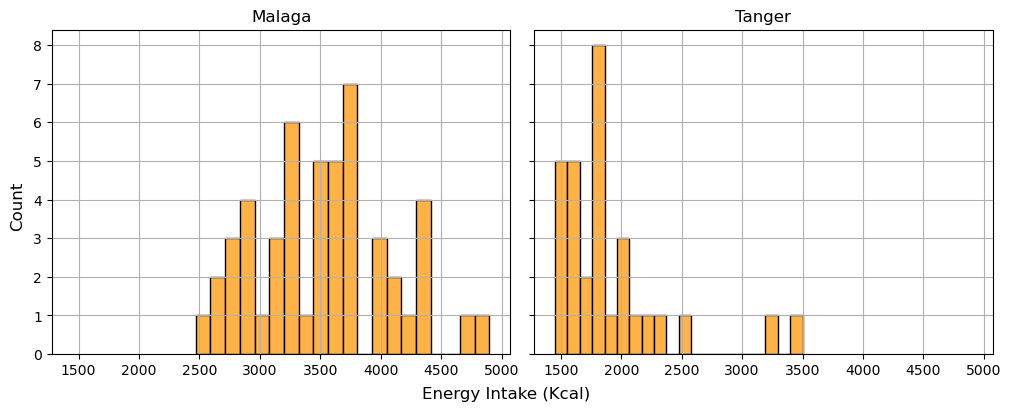

In [204]:
groups = df['Group'].unique() # Gets all the groups
plot_histogram(df, groups)

The histograms reveal a wider distribution of energy intake values in Malaga; while in Tanger there are fewer instances reaching higher energy intake levels. Therefore, we can conclude that Tanger's distribution is more uniform and narrower

Using boxplot, we will compare the energy intake between the two groups.

In [94]:
def plot_consumo_box(df, groups):
    plt.figure(dpi = 144)

    # Gets the data in the 'Energy Intake' column divided by groups
    dg = [df[df['Group'] == group]['Energy Intake'] for group in groups]
    plt.boxplot(dg, labels = groups) # Creates the boxplot
    
    plt.ylabel('Energy Intake (Kcal)')
    plt.show()
    return

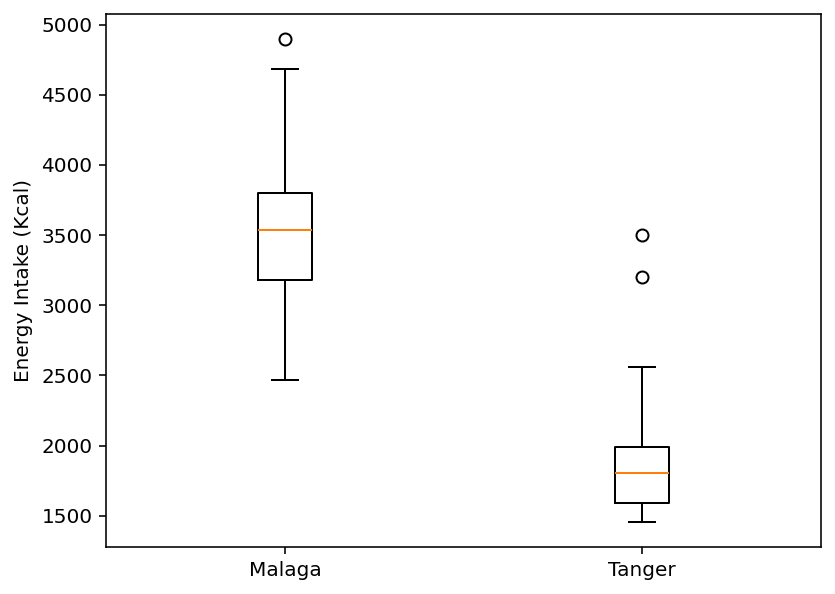

In [96]:
plot_consumo_box(df, groups)

The median energy intake (orange line) in Malaga is about 3000 Kcal, with the IQR -interquartile range- (box) from 2500 to 3500 Kcal. Furthermore, there are outliers indicating higher energy intake levels.

On the other hand, in Tanger, the median energy intake is lower, around 2000 Kcal, with the IQR ranging from about 1500 to 2500 Kcal.

Given the large differences between the two groups, we will now explore whether there are also differences in the cholesterol variable, for example.

In [99]:
def plot_consumo_box(df, groups):
    plt.figure(dpi = 144)

    # Gets the data in the 'Cholesterol' column divided by groups
    dg = [df[df['Group'] == group]['Cholesterol'] for group in groups]
    plt.boxplot(dg, labels = groups) # Creates the boxplot
    
    plt.ylabel('Cholesterol (mg/dL)')
    plt.show()
    return

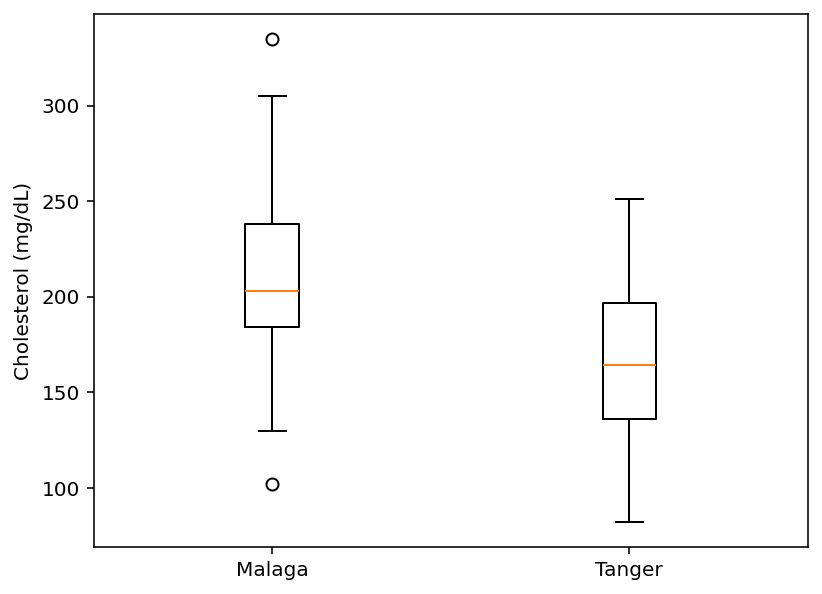

In [101]:
plot_consumo_box(df, groups)

In Malaga, the median cholesterol level is around 200 mg/dL, with the IQR stretching from 150 to 250 mg/dL, approximately. The whiskers show the range for the bulk of the data -excluding outliers-, and they value from about 100 to 300 mg/dL.

In Tanger, the median cholesterol is slightly lower, around 175 mg/dL. The IQR is narrower than in Malaga, from roughly 150 to 200 mg/dL. The range extends from about 150 to 250 mg/dL, with no outliers.

Because of this, we may think that there is an association between energy intake and Cholesterol that would explain the differences between Malaga and Tanger. To explore that, we make a scatter plot.

In [198]:
def plot_regresion(df, groups):
    # Creates the figure and the axes
    fig, ax = plt.subplots(dpi=144, figsize=(8, 6))

    for group in groups:
        # Gets a dataframe with the rows that belong to the group being studied
        dg = df[df['Group'] == group]
        # Generates a scatter plot comparing the cholesterol against the energy intake for the group being studied
        ax.scatter(dg['Energy Intake'], dg['Cholesterol'], marker = 'o', s = 10, label = group)

        # Sets a linear regression line (degree 1) to the data
        # Saves the results in the coefficients of the equation of the line
        m, b = np.polyfit(dg['Energy Intake'], dg['Cholesterol'], 1)
        # Draws a line in the graph given the axes X and the equation of the line
        ax.plot(dg['Energy Intake'], m * dg['Energy Intake'] + b, label = f'Regresion {group}')

    ax.grid(True)
    ax.set_xlabel('Energy Intake (Kcal)')
    ax.set_ylabel('Cholesterol (mg/dL)')
    ax.legend()
    return

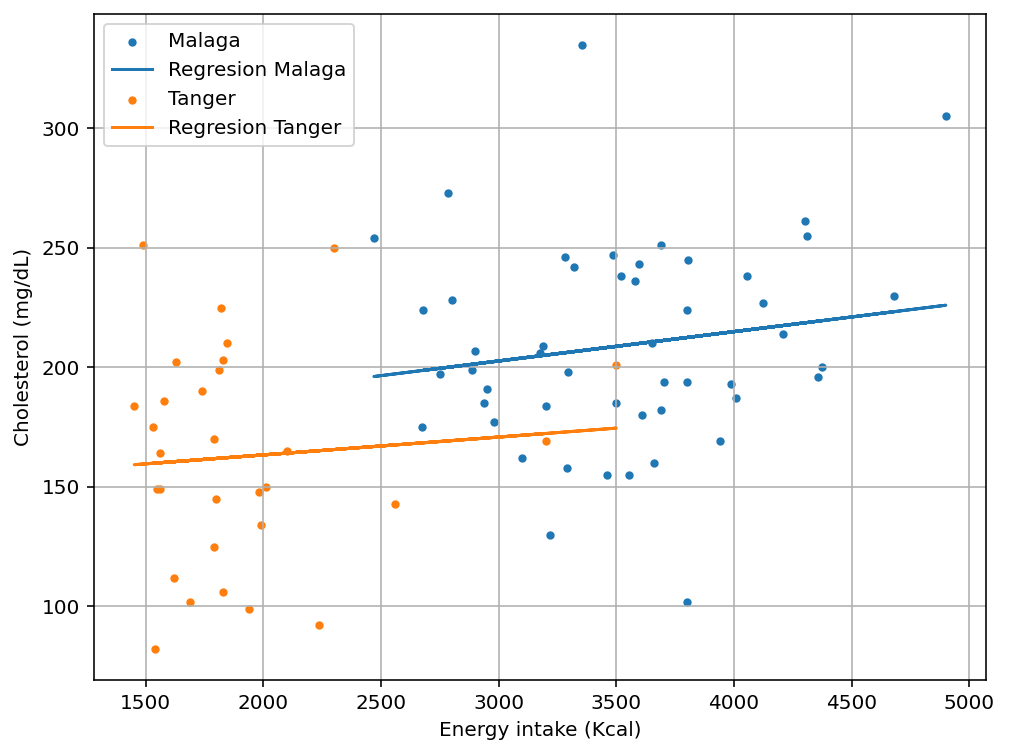

In [200]:
plot_regresion(df, groups)

Apparently, a higher energy intake is associated with a small increase in choresterol levels. This is because the two lines are almost parallel, but at different heights. This means that the cholesterol will not explain on his own the reasons behind the large differences in energy intake between Malaga and Tanger. To conclude, the differences in the cholesterol levels explained through the energy intake are not as obvious as they seemed when using the box plot.